In [ ]:
#pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
spambase = fetch_ucirepo(id=94)

# Fata (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# Metadata
print(spambase.metadata)

# Variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Load Features (X) and Target (y) Separately

In [ ]:
# Verify features (X) and target (y) are loaded correctly
print("Features (X) Shape:", X.shape)
print("Target (y) Shape:", y.shape)

# Display the first few rows of features and target
print("\nFirst few rows of Features (X):")
print(X.head())

print("\nFirst few rows of Target (y):")
print(y.head())

Features (X) Shape: (4601, 57)
Target (y) Shape: (4601, 1)

First few rows of Features (X):
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  word_fr

Compute Summary Statistics

In [ ]:
# Combine features (X) and target (y) into a single DataFrame
df = X.copy()  # Create a copy of the features
df["spam"] = y  # Add the target column to the DataFrame

# Compute summary statistics
summary_stats = df.describe().T  # Transpose for better readability
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                             count        mean         std  min     25%  \
word_freq_make              4601.0    0.104553    0.305358  0.0   0.000   
word_freq_address           4601.0    0.213015    1.290575  0.0   0.000   
word_freq_all               4601.0    0.280656    0.504143  0.0   0.000   
word_freq_3d                4601.0    0.065425    1.395151  0.0   0.000   
word_freq_our               4601.0    0.312223    0.672513  0.0   0.000   
word_freq_over              4601.0    0.095901    0.273824  0.0   0.000   
word_freq_remove            4601.0    0.114208    0.391441  0.0   0.000   
word_freq_internet          4601.0    0.105295    0.401071  0.0   0.000   
word_freq_order             4601.0    0.090067    0.278616  0.0   0.000   
word_freq_mail              4601.0    0.239413    0.644755  0.0   0.000   
word_freq_receive           4601.0    0.059824    0.201545  0.0   0.000   
word_freq_will              4601.0    0.541702    0.861698  0.0   0.000   
word_

Plot Correlation Between the Target and Each Feature

Correlation values between features and target (spam):
word_freq_make                0.126208
word_freq_address            -0.030224
word_freq_all                 0.196988
word_freq_3d                  0.057371
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_will                0.007741
word_freq_people              0.132927
word_freq_report              0.060027
word_freq_addresses           0.195902
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_font                0.091860
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq

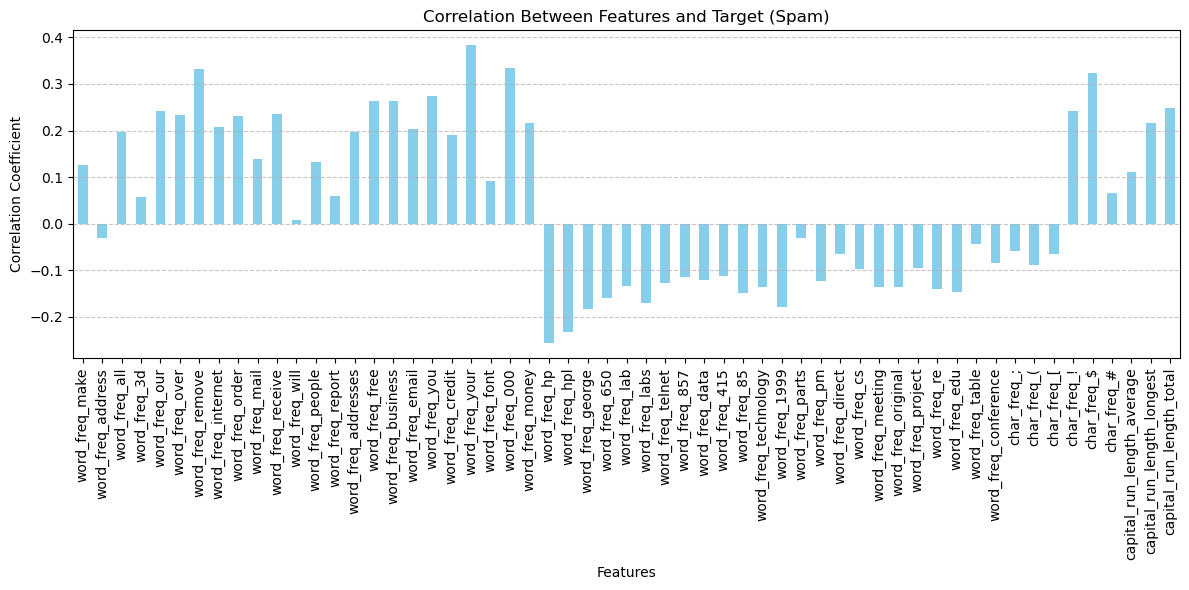

In [ ]:
import matplotlib.pyplot as plt

# Compute correlation of all features with the target
correlations = df.corr()["spam"][:-1]  # Exclude self-correlation with "spam"

# Display correlation values
print("Correlation values between features and target (spam):")
print(correlations)

# Plot the correlations as a bar chart
plt.figure(figsize=(12, 6))
correlations.plot(kind="bar", color="skyblue", title="Correlation Between Features and Target (Spam)")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Normalize and split the data into training, validation, and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the training and testing feature sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)       # Transform testing data

Initiate a LogisticRegression model with elasticnet penalty

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
model = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    max_iter=10000
)

# Define the hyperparameter grid
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],       # Regularization strength
    "l1_ratio": [0, 0.25, 0.5, 0.75, 1]  # ElasticNet mixing parameter
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="accuracy",
    cv=3,           # 3-fold cross-validation
    verbose=3       # Display progress during fitting
)

# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ................C=0.01, l1_ratio=0;, score=0.893 total time=   0.1s
[CV 2/3] END ................C=0.01, l1_ratio=0;, score=0.907 total time=   0.1s
[CV 3/3] END ................C=0.01, l1_ratio=0;, score=0.901 total time=   0.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

[CV 1/3] END .............C=0.01, l1_ratio=0.25;, score=0.878 total time=   0.1s
[CV 2/3] END .............C=0.01, l1_ratio=0.25;, score=0.896 total time=   0.1s
[CV 3/3] END .............C=0.01, l1_ratio=0.25;, score=0.894 total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..............C=0.01, l1_ratio=0.5;, score=0.867 total time=   0.1s
[CV 2/3] END ..............C=0.01, l1_ratio=0.5;, score=0.870 total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..............C=0.01, l1_ratio=0.5;, score=0.880 total time=   0.1s
[CV 1/3] END .............C=0.01, l1_ratio=0.75;, score=0.852 total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .............C=0.01, l1_ratio=0.75;, score=0.846 total time=   0.1s
[CV 3/3] END .............C=0.01, l1_ratio=0.75;, score=0.869 total time=   0.1s
[CV 1/3] END ................C=0.01, l1_ratio=1;, score=0.831 total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ................C=0.01, l1_ratio=1;, score=0.833 total time=   0.1s
[CV 3/3] END ................C=0.01, l1_ratio=1;, score=0.856 total time=   0.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .................C=0.1, l1_ratio=0;, score=0.903 total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .................C=0.1, l1_ratio=0;, score=0.915 total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .................C=0.1, l1_ratio=0;, score=0.925 total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..............C=0.1, l1_ratio=0.25;, score=0.900 total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..............C=0.1, l1_ratio=0.25;, score=0.917 total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..............C=0.1, l1_ratio=0.25;, score=0.925 total time=   0.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...............C=0.1, l1_ratio=0.5;, score=0.900 total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...............C=0.1, l1_ratio=0.5;, score=0.919 total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...............C=0.1, l1_ratio=0.5;, score=0.926 total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..............C=0.1, l1_ratio=0.75;, score=0.902 total time=   0.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..............C=0.1, l1_ratio=0.75;, score=0.912 total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..............C=0.1, l1_ratio=0.75;, score=0.923 total time=   0.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .................C=0.1, l1_ratio=1;, score=0.903 total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .................C=0.1, l1_ratio=1;, score=0.912 total time=   0.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .................C=0.1, l1_ratio=1;, score=0.919 total time=   0.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...................C=1, l1_ratio=0;, score=0.912 total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...................C=1, l1_ratio=0;, score=0.914 total time=   1.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...................C=1, l1_ratio=0;, score=0.928 total time=   0.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ................C=1, l1_ratio=0.25;, score=0.912 total time=   1.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ................C=1, l1_ratio=0.25;, score=0.916 total time=   2.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ................C=1, l1_ratio=0.25;, score=0.929 total time=   0.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .................C=1, l1_ratio=0.5;, score=0.912 total time=   1.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .................C=1, l1_ratio=0.5;, score=0.918 total time=   2.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .................C=1, l1_ratio=0.5;, score=0.929 total time=   1.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ................C=1, l1_ratio=0.75;, score=0.912 total time=   1.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ................C=1, l1_ratio=0.75;, score=0.919 total time=   2.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ................C=1, l1_ratio=0.75;, score=0.929 total time=   1.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...................C=1, l1_ratio=1;, score=0.912 total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...................C=1, l1_ratio=1;, score=0.919 total time=   3.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...................C=1, l1_ratio=1;, score=0.930 total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..................C=10, l1_ratio=0;, score=0.912 total time=   2.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..................C=10, l1_ratio=0;, score=0.921 total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..................C=10, l1_ratio=0;, score=0.929 total time=   2.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...............C=10, l1_ratio=0.25;, score=0.912 total time=   3.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...............C=10, l1_ratio=0.25;, score=0.922 total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...............C=10, l1_ratio=0.25;, score=0.929 total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ................C=10, l1_ratio=0.5;, score=0.912 total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ................C=10, l1_ratio=0.5;, score=0.921 total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ................C=10, l1_ratio=0.5;, score=0.929 total time=   3.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...............C=10, l1_ratio=0.75;, score=0.912 total time=   3.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...............C=10, l1_ratio=0.75;, score=0.922 total time=   3.9s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...............C=10, l1_ratio=0.75;, score=0.929 total time=   3.7s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..................C=10, l1_ratio=1;, score=0.912 total time=   3.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..................C=10, l1_ratio=1;, score=0.922 total time=   4.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..................C=10, l1_ratio=1;, score=0.929 total time=   3.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .................C=100, l1_ratio=0;, score=0.912 total time=   2.6s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .................C=100, l1_ratio=0;, score=0.920 total time=   3.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .................C=100, l1_ratio=0;, score=0.930 total time=   3.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..............C=100, l1_ratio=0.25;, score=0.912 total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..............C=100, l1_ratio=0.25;, score=0.920 total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..............C=100, l1_ratio=0.25;, score=0.930 total time=   4.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ...............C=100, l1_ratio=0.5;, score=0.912 total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ...............C=100, l1_ratio=0.5;, score=0.920 total time=   4.4s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ...............C=100, l1_ratio=0.5;, score=0.930 total time=   4.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END ..............C=100, l1_ratio=0.75;, score=0.912 total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END ..............C=100, l1_ratio=0.75;, score=0.920 total time=   4.3s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END ..............C=100, l1_ratio=0.75;, score=0.930 total time=   4.1s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END .................C=100, l1_ratio=1;, score=0.912 total time=   3.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END .................C=100, l1_ratio=1;, score=0.920 total time=   4.2s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END .................C=100, l1_ratio=1;, score=0.930 total time=   4.0s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             scoring='accuracy', verbose=3)

Report the cross-validation results

In [ ]:
# Convert GridSearchCV results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Select the columns to display
columns_to_display = ["param_C", "param_l1_ratio", "mean_test_score", "rank_test_score"]
results_df = results_df[columns_to_display]

# Sort the results by the test score rank
results_df = results_df.sort_values(by="rank_test_score")

# Display the sorted results
print("Cross-Validation Results:")
print(results_df)

Cross-Validation Results:
   param_C param_l1_ratio  mean_test_score  rank_test_score
19      10              1         0.921121                1
18      10           0.75         0.921121                1
16      10           0.25         0.921121                1
24     100              1         0.920810                4
22     100            0.5         0.920810                4
21     100           0.25         0.920810                4
20     100              0         0.920810                4
17      10            0.5         0.920810                4
23     100           0.75         0.920810                4
15      10              0         0.920500               10
14       1              1         0.920189               11
13       1           0.75         0.919878               12
12       1            0.5         0.919568               13
11       1           0.25         0.919257               14
10       1              0         0.918325               15
7      0.1    

Which model was selected

In [ ]:
# Display the best model's parameters and cross-validation score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Model:")
print(best_model)
print("\nBest Cross-Validation Accuracy:")
print(best_score)

Best Model:
LogisticRegression(C=10, l1_ratio=0.25, max_iter=10000, penalty='elasticnet',
                   solver='saga')

Best Parameters:
{'C': 10, 'l1_ratio': 0.25}

Best Cross-Validation Accuracy:
0.9211206968864453


Evaluate the model on the test dataset

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Predict on the test dataset using the best model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate test set accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Report the square root of accuracy
sqrt_accuracy = np.sqrt(test_accuracy)

print("Test set accuracy:", test_accuracy)
print("Square root of test accuracy:", sqrt_accuracy)

Test set accuracy: 0.9268645908761767
Square root of test accuracy: 0.9627380697137601


Display the top 10 positive and top 10 negative parameter estimates

In [ ]:
# Extract coefficients from the best model
coefficients = grid_search.best_estimator_.coef_.flatten()
feature_names = X.columns

# Create a DataFrame with features and coefficients
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Identify top 10 positive and negative coefficients
top_p = coef_df.sort_values(by="Coefficient", ascending=False).head(10)
top_n = coef_df.sort_values(by="Coefficient", ascending=True).head(10)

# Display results
print("Top 10 Positive Parameter Estimates:")
print(top_p)

print("\nTop 10 Negative Parameter Estimates:")
print(top_n)

Top 10 Positive Parameter Estimates:
                       Feature  Coefficient
3                 word_freq_3d     1.572157
52                 char_freq_$     1.046029
55  capital_run_length_longest     0.965672
53                 char_freq_#     0.924442
15              word_freq_free     0.922370
22               word_freq_000     0.878369
6             word_freq_remove     0.816274
19            word_freq_credit     0.684139
56    capital_run_length_total     0.661362
35        word_freq_technology     0.473212

Top 10 Negative Parameter Estimates:
                 Feature  Coefficient
26      word_freq_george    -7.958383
24          word_freq_hp    -3.234450
40          word_freq_cs    -2.875583
43     word_freq_project    -1.748450
41     word_freq_meeting    -1.301080
45         word_freq_edu    -1.168829
47  word_freq_conference    -1.102971
28         word_freq_lab    -1.102436
34          word_freq_85    -0.859980
44          word_freq_re    -0.816531
